In [2]:
import numpy as np
import pandas as pd

In [3]:
data_frame=pd.read_csv('../artifacts/Prepared_laptop_price.csv')

In [4]:
data_frame.head(5)

,Ram,Weight,Price_euros,TouchScreen,IPS,Company_Acer,Company_Apple,Company_Asus,Company_Dell,Company_HP,...,OpSys_Other,OpSys_Windows,cpu_name_AMD,cpu_name_Intel Core i3,cpu_name_Intel Core i5,cpu_name_Intel Core i7,cpu_name_Other,gpu_name_AMD,gpu_name_Intel,gpu_name_Nvidia
0,8,1.37,1339.69,0,1,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,8,1.34,898.94,0,0,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,8,1.86,575.00,0,0,False,False,False,False,True,...,True,False,False,False,True,False,False,False,True,False
3,16,1.83,2537.45,0,1,False,True,False,False,False,...,False,False,False,False,False,True,False,True,False,False
4,8,1.37,1803.60,0,1,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ram                          1302 non-null   int64  
 1   Weight                       1302 non-null   float64
 2   Price_euros                  1302 non-null   float64
 3   TouchScreen                  1302 non-null   int64  
 4   IPS                          1302 non-null   int64  
 5   Company_Acer                 1302 non-null   bool   
 6   Company_Apple                1302 non-null   bool   
 7   Company_Asus                 1302 non-null   bool   
 8   Company_Dell                 1302 non-null   bool   
 9   Company_HP                   1302 non-null   bool   
 10  Company_Lenovo               1302 non-null   bool   
 11  Company_MSI                  1302 non-null   bool   
 12  Company_Other                1302 non-null   bool   
 13  Company_Toshiba   

Model Building and Selection

In [7]:
X = data_frame.drop('Price_euros', axis=1)
y = data_frame['Price_euros']

In [10]:
pip install scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 1.3 MB/s eta 0:00:09
   - -------------------------------------- 0.5/11.1 MB 1.3 MB/s eta 0:00:09
   - -------------------------------------- 0.5/11.1 MB 1.3 MB/s eta 0:00:09
   - -------------------------------------- 0.5/11.1 MB 1.3 MB/s eta 0:00:09
   - -------------------------------------- 0.5/11.1 MB 1.3 MB/s eta 0:00:09
   -- ------------------------------------- 0.8/11.1 MB 419.0 kB/s eta 0:00:25
   --- ------------------------------------ 1.0/11.1 MB 519.6 kB/s eta 0:00:20
   --- ------------------------------------ 1.0/11.1 MB 519.6 kB/s eta 0:00:20
   ---- ----------------------------------- 1.3/11.1 MB 554.0 kB/s eta 0:00:18
   ----- ---------------------------------- 1.6/11.1 MB 624.6 kB/s eta 0:00:16
   ----- -

Divide dataset into training and testing set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [14]:
X_train.shape, X_test.shape

((976, 31), (326, 31))

model training

In [15]:
def model_acc(model):
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(str(model)+ ' --> ' +str(acc))

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model_acc(lr)

from sklearn.linear_model import Lasso
lasso = Lasso()
model_acc(lasso)

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
model_acc(dt)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model_acc(rf)

LinearRegression() --> 0.7279581962796718
Lasso() --> 0.7244481738363258
DecisionTreeRegressor() --> 0.6510424710422507
RandomForestRegressor() --> 0.8127705985327334


In [18]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9568\4131270588.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="viridis")


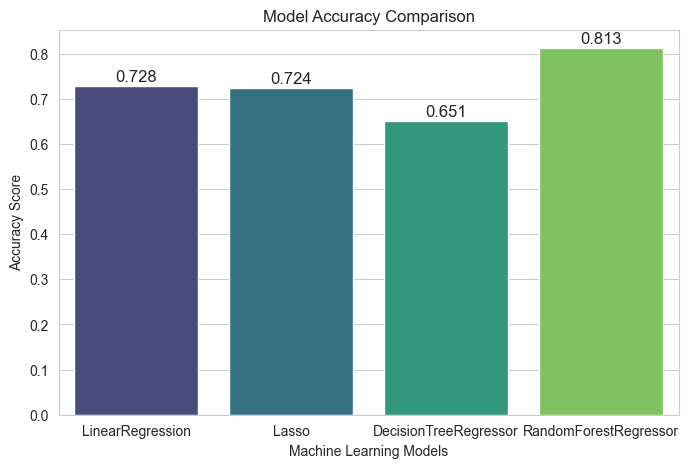

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model names and their accuracies
models = ["LinearRegression", "Lasso", "DecisionTreeRegressor", "RandomForestRegressor"]
accuracies = [0.7279, 0.7244, 0.6510, 0.8128]  # Using rounded values for clarity

# Set style
sns.set_style("whitegrid")

# Create bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette="viridis")

# Add labels and title
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")

# Show values on top of bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.3f}", ha="center", fontsize=12)

# Show the plot
plt.show()


Hyperparameter tunning

In [22]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10, 50, 100],
              'criterion':['squared_error','absolute_error','poisson']}

grid_obj = GridSearchCV(estimator=rf, param_grid=parameters)

grid_fit = grid_obj.fit(X_train, y_train)

best_model = grid_fit.best_estimator_
best_model
best_model.score(X_test, y_test)

0.8030858440427953

In [23]:
X_test.columns

Index(['Ram', 'Weight', 'TouchScreen', 'IPS', 'Company_Acer', 'Company_Apple',
       'Company_Asus', 'Company_Dell', 'Company_HP', 'Company_Lenovo',
       'Company_MSI', 'Company_Other', 'Company_Toshiba',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'OpSys_Linux', 'OpSys_Mac', 'OpSys_Other', 'OpSys_Windows',
       'cpu_name_AMD', 'cpu_name_Intel Core i3', 'cpu_name_Intel Core i5',
       'cpu_name_Intel Core i7', 'cpu_name_Other', 'gpu_name_AMD',
       'gpu_name_Intel', 'gpu_name_Nvidia'],
      dtype='object')

Save model

In [24]:
import pickle
with open('predictor.pickle', 'wb') as file:
    pickle.dump(best_model, file)

In [25]:
pred_value = best_model.predict([[8, 1.3, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0]])
pred_value

D:\My Projects\Laptop_Price_Predictor\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1268.9321])